In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset (same as used in Naive Bayes)
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')  # Update with your file path

# Convert Severity to binary classification: 1 for Severe (3 and 4), 0 for Non-Severe (1 and 2)
df['Severity'] = df['Severity'].apply(lambda x: 1 if x >= 3 else 0)

# Select relevant columns
df = df[['Severity', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Traffic_Signal']]
df = df.dropna()

# Undersample the majority class to 70% of its original size
df_majority = df[df['Severity'] == 0]
df_minority = df[df['Severity'] == 1]
target_majority_size = int(0.7 * len(df_majority))
df_majority_undersampled = resample(df_majority, replace=False, n_samples=target_majority_size, random_state=42)
df_balanced = pd.concat([df_majority_undersampled, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Encode categorical columns for decision tree compatibility
X = df_balanced.drop(columns=['Severity'])
y = df_balanced['Severity']
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Split into training and testing sets with stratified sampling to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [4]:
# Display a small sample of the training and testing data
print("Training Set Sample:\n", X_train.head())
print("Testing Set Sample:\n", X_test.head())


Training Set Sample:
          Weather_Condition  Sunrise_Sunset  Civil_Twilight  Traffic_Signal
2346679                 15               1               1            True
5653122                  6               0               0            True
3567968                 15               0               0           False
5152096                 84               1               0           False
2537933                 15               1               1           False
Testing Set Sample:
          Weather_Condition  Sunrise_Sunset  Civil_Twilight  Traffic_Signal
2983070                  6               0               0            True
4183591                 15               0               0           False
3607323                  7               0               0           False
4499027                 15               0               0           False
1808288                 15               0               0           False


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Initialize and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.7480367515443443
Decision Tree Confusion Matrix:
 [[1242110   32796]
 [ 399068   40022]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85   1274906
           1       0.55      0.09      0.16    439090

    accuracy                           0.75   1713996
   macro avg       0.65      0.53      0.50   1713996
weighted avg       0.70      0.75      0.67   1713996



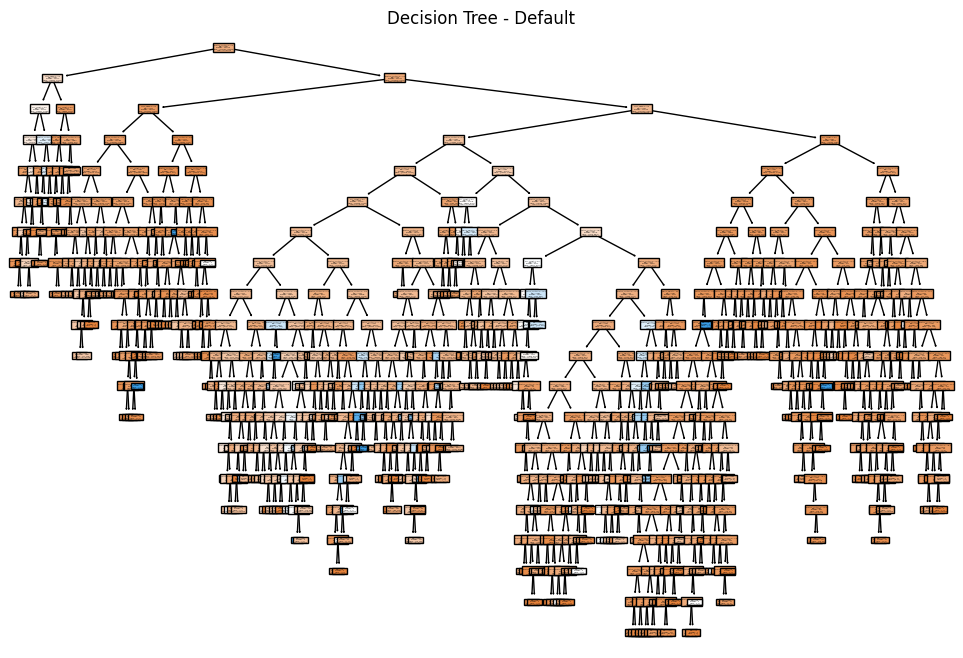

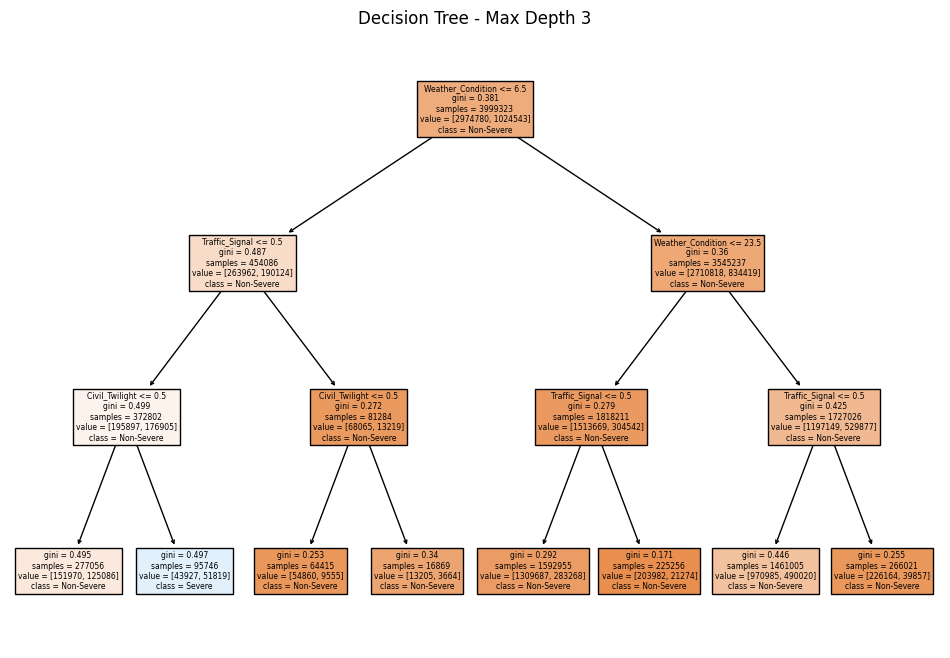

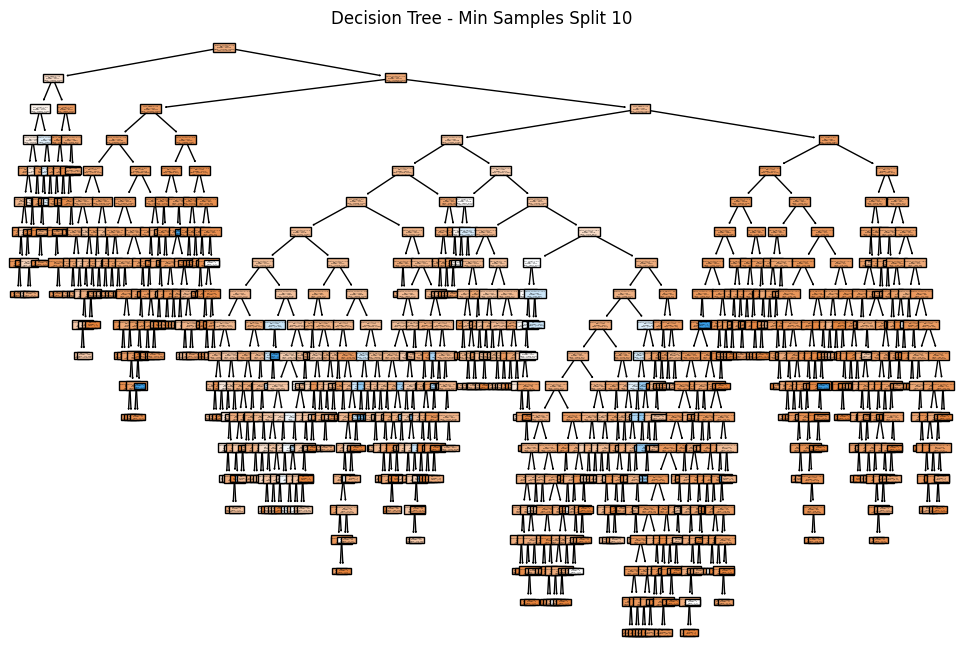

In [6]:
# Define three different configurations
configurations = [
    {"name": "Default", "model": DecisionTreeClassifier(random_state=42)},
    {"name": "Max Depth 3", "model": DecisionTreeClassifier(max_depth=3, random_state=42)},
    {"name": "Min Samples Split 10", "model": DecisionTreeClassifier(min_samples_split=10, random_state=42)}
]

# Visualize each tree
for config in configurations:
    model = config["model"]
    model.fit(X_train, y_train)
    plt.figure(figsize=(12, 8))
    tree.plot_tree(model, feature_names=X.columns, class_names=["Non-Severe", "Severe"], filled=True)
    plt.title(f"Decision Tree - {config['name']}")
    plt.show()


In [7]:
# Displaying the results of the default model
print("\nDefault Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))



Default Decision Tree Results:
Accuracy: 0.7480367515443443
Confusion Matrix:
 [[1242110   32796]
 [ 399068   40022]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85   1274906
           1       0.55      0.09      0.16    439090

    accuracy                           0.75   1713996
   macro avg       0.65      0.53      0.50   1713996
weighted avg       0.70      0.75      0.67   1713996

